# Hypothesis 2 (Trina)
**Higher share of renewable energy generation is associated with lower carbon intensity levels, indicating a cleaner energy production.**

**Rationale:**
- Renewable energy cause low to zero CO2 emissions
- It is a direct replacement of fossil fuels
- Therefore it reduces the CO2 emissions caused when producing energy


**Data Required:**
- **Renewable Energy Indicators:** country, year, share of renewable energy generation, share of type of renewable energy
- **Emissions by Country:** country, year, carbon intensity


**Analysis Plan:**
- Step 1: Merge this carbon intensity with share of renewable energy generation on a country-year level.
- Step 2: Perform testing on the relationship between carbon intensity and share of renewable energy in electricity generation.
- Step 3: Perform regression analysis to determine if the share of renewable energy is a significant predictor of carbon intensity levels among countries and years. 
- Step 4: Merge share of type of renewable energy to the other data look at the 15 countries with the highest and lowest carbon intensity.
- Step 5: Check for economic indicators and their impact on the model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm

## Step 1: Merge this carbon intensity with share of renewable energy generation on a country-year level.

In [ ]:
re_share = pd.read_csv('./data_clean/re_share.csv', index_col=0)
re_share.drop(columns=['share_cap_%', 'share_con_%'])
re_share.head()

,country,country_code,year,share_cap_%,share_gen_%,share_con_%
0,Afghanistan,AFG,2000-01-01,86.56,93.54,44.99
1,Afghanistan,AFG,2001-01-01,86.56,93.54,45.60
2,Afghanistan,AFG,2002-01-01,86.56,93.54,37.83
3,Afghanistan,AFG,2003-01-01,83.80,80.63,36.66
4,Afghanistan,AFG,2004-01-01,78.66,62.86,44.24


In [ ]:
emissions = pd.read_csv('./data_clean/emissions_by_country.csv', index_col=0)
emissions.head()

,country_code,country,year,co2_emission_per_mio_usd,co2_per_capita,ghg_emission_per_mio_usd,ghg_emission_per_capita,carbon_intensity
0,CHN,China,1990-01-01,5788.58,1.84,6537.34,2.08,NaN
1,USA,United States,1990-01-01,806.80,19.27,861.15,20.57,NaN
2,IND,India,1990-01-01,1686.17,0.62,1934.58,0.71,NaN
3,RUS,Russia,1990-01-01,4186.29,14.62,5013.07,17.51,NaN
4,JPN,Japan,1990-01-01,335.74,8.52,339.82,8.62,NaN


In [ ]:
# Merge emissions data to re_share country_code, country, and year
emissions_share = pd.merge(emissions, re_share, on=['country_code', 'country', 'year'], how='inner')
emissions_share

,country_code,country,year,co2_emission_per_mio_usd,co2_per_capita,ghg_emission_per_mio_usd,ghg_emission_per_capita,carbon_intensity,share_cap_%,share_gen_%,share_con_%
0,CHN,China,2000-01-01,2560.89,2.46,2826.53,2.71,783.31,23.70,16.45,29.63
1,USA,United States,2000-01-01,559.40,20.32,592.11,21.51,571.16,10.69,8.15,5.43
2,IND,India,2000-01-01,1904.16,0.84,2098.94,0.93,740.04,21.18,13.77,46.88
3,RUS,Russia,2000-01-01,5963.32,10.56,7257.36,12.86,470.05,20.86,17.83,3.50
4,JPN,Japan,2000-01-01,231.33,9.06,234.47,9.18,424.43,9.18,9.08,3.70
...,...,...,...,...,...,...,...,...,...,...,...
4149,MHL,Marshall Islands,2020-01-01,449.97,1.86,449.97,1.86,NaN,5.60,2.43,11.97
4150,FSM,Micronesia,2020-01-01,262.08,0.93,263.79,0.93,NaN,10.27,6.19,2.03
4151,KIR,Kiribati,2020-01-01,305.12,0.46,314.52,0.48,666.67,32.94,16.37,42.75
4152,NRU,Nauru,2020-01-01,336.75,3.56,361.17,3.82,750.00,9.30,6.71,1.40


## Step 2: Perform testing on the relationship between carbon intensity and share of renewable energy in electricity generation.

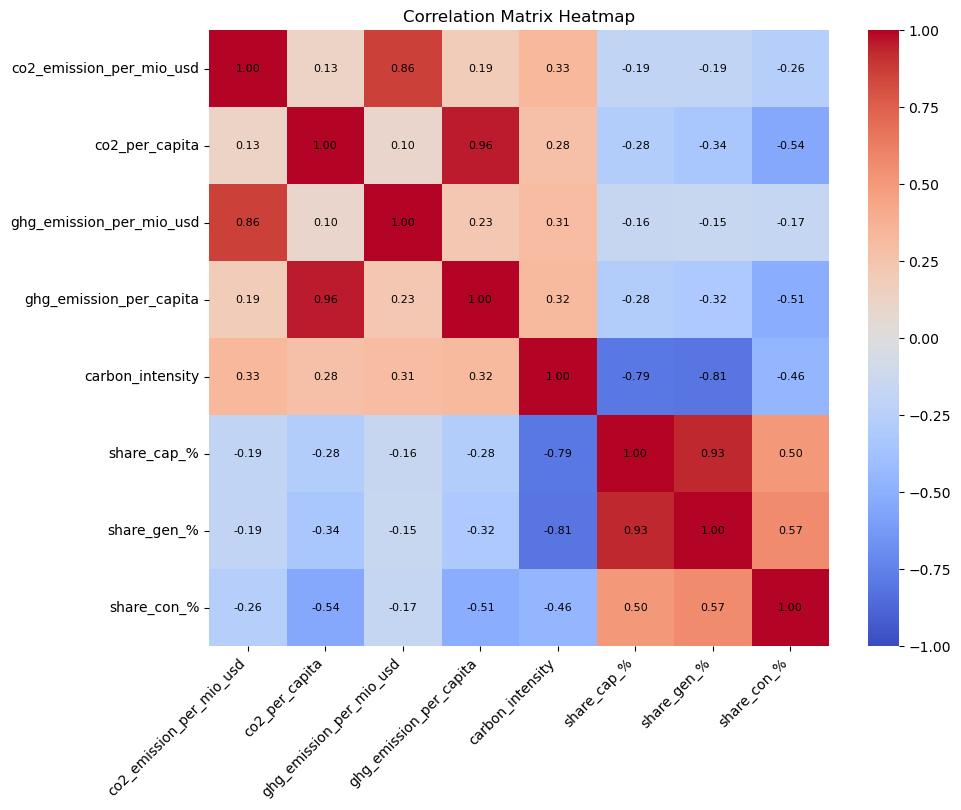

In [ ]:
# Calculate the correlation matrix for the numeric columns
correlation_matrix = emissions_share.corr().round(2)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)

# Add annotations for all cells
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j + 0.5, i + 0.5, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='black', fontsize=8)

# Add titles and labels
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Display the plot
plt.show()

Insights: 
We can see a strong negative correlation (-0.82) between the renewable energy share of electricity generation (share_gen_%) as well as the the CO2 emission per unit of electricity produced (carbon_intensity)

In [ ]:
# Remove rows with NaN or inf values in 'carbon_intensity' or 'share_gen_%'
emissions_share = emissions_share.replace([np.inf, -np.inf], np.nan).dropna(subset=['carbon_intensity', 'share_gen_%'])


# Calculate the Pearson correlation coefficient and p-value
corr_coefficient, p_value = pearsonr(emissions_share['carbon_intensity'], emissions_share['share_gen_%'])

# Display the results
print(f"Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

Correlation Coefficient: -0.810129547351323
P-value: 0.0


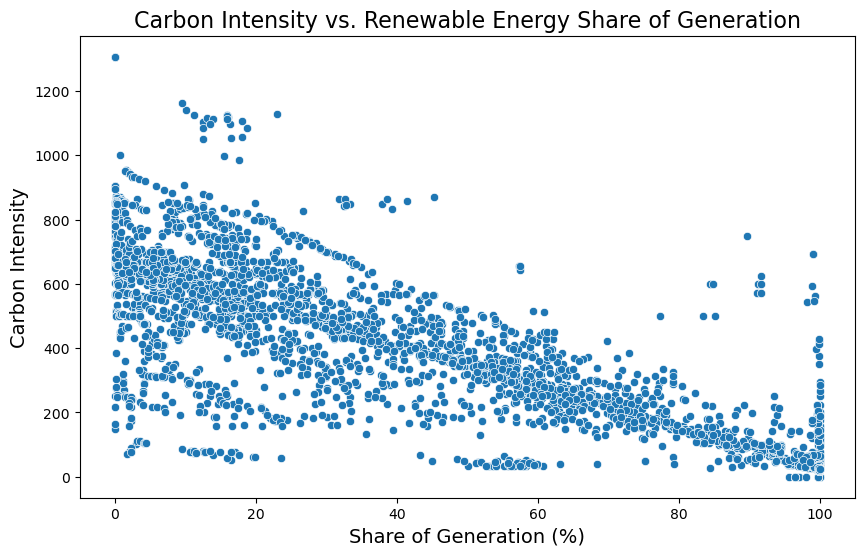

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a scatter plot with seaborn
sns.scatterplot(x='share_gen_%', y='carbon_intensity', data=emissions_share)

# Add titles and labels
plt.title('Carbon Intensity vs. Renewable Energy Share of Generation', fontsize=16)
plt.xlabel('Share of Generation (%)', fontsize=14)
plt.ylabel('Carbon Intensity', fontsize=14)

# Display the plot
plt.show()

## Step 3: Perform regression analysis to determine if the share of renewable energy is a significant predictor of carbon intensity levels among countries and years. 

In [ ]:
# Define the dependent variable and independent variable
X = emissions_share['share_gen_%']
y = emissions_share['carbon_intensity']

# Add a constant to the independent variable for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       carbon_intensity   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     6739.
Date:                Thu, 13 Jun 2024   Prob (F-statistic):               0.00
Time:                        10:29:17   Log-Likelihood:                -22657.
No. Observations:                3531   AIC:                         4.532e+04
Df Residuals:                    3529   BIC:                         4.533e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         658.7605      3.632    181.360      

**Policy Implications:**
The negative relationship between share_gen_% and carbon_intensity suggests that policies promoting renewable energy generation can effectively reduce carbon intensity. This can be useful for policymakers aiming to reduce carbon emissions and combat climate change.

## Step 4: Merge share of type of renewable energy to the other data look at the 15 countries with the highest and lowest carbon intensity.

Calculate the share of each type of renewable energy in the total mix of renewable energy 

In [ ]:
type_share = pd.read_csv('./data_clean/re_indicators.csv', delimiter=',', index_col=0)
type_share.head()

,country,year,type,electricity_generation_gwh,electricity_capacity_mw
0,Afghanistan,2000-01-01,Biofuels,0.000,0.000
1,Afghanistan,2000-01-01,Geothermal,0.000,0.000
2,Afghanistan,2000-01-01,Hydropower,457.939,191.503
3,Afghanistan,2000-01-01,Others,0.000,0.000
4,Afghanistan,2000-01-01,Solar,0.000,0.000


In [ ]:
# Replace 'Total Renewable' generation with the sum of individual renewable types
renewable_types = ['Biofuels', 'Geothermal', 'Hydropower', 'Solar', 'Wind', 'Others']
type_share['Total Renewable'] = type_share.apply(lambda row: row['electricity_generation_gwh'] if row['type'] == 'Total Renewable' else 0, axis=1)
type_share['Total Renewable'] = type_share.groupby(['country', 'year'])['Total Renewable'].transform('sum')

# Calculate the share by type and multiply by 100 to get percentage
type_share['share_type_gen_%'] = type_share.apply(
    lambda row: (row['electricity_generation_gwh'] / row['Total Renewable']) * 100 if row['Total Renewable'] != 0 else 0,
    axis=1
)

# Drop the intermediate 'Total Renewable' column as it's not needed anymore
type_share.drop(columns=['Total Renewable'], inplace=True)

# Display the first few rows to verify the result
type_share.head()

,country,year,type,electricity_generation_gwh,electricity_capacity_mw,share_type_gen_%
0,Afghanistan,2000-01-01,Biofuels,0.000,0.000,0.0
1,Afghanistan,2000-01-01,Geothermal,0.000,0.000,0.0
2,Afghanistan,2000-01-01,Hydropower,457.939,191.503,100.0
3,Afghanistan,2000-01-01,Others,0.000,0.000,0.0
4,Afghanistan,2000-01-01,Solar,0.000,0.000,0.0


Drop the columns electricity_generation_gwh and electricity_capacity_mw, then pivot the table so that each type's share is represented as a separate column. 

In [ ]:
# Drop the columns 'electricity_generation_gwh' and 'electricity_capacity_mw'
type_share.drop(columns=['electricity_generation_gwh', 'electricity_capacity_mw'], inplace=True)

# Pivot the table so that the 'type' column values become new columns
type_share_pivot = type_share.pivot_table(index=['country', 'year'], columns='type', values='share_type_gen_%', fill_value=0)

# Reset index to turn the index into columns
type_share_pivot.reset_index(inplace=True)

# Flatten the column names
type_share_pivot.columns.name = None

# Rename columns to lower them and add '_%' suffix
new_column_names = {col: f"{col.lower()}_%" for col in type_share_pivot.columns if col not in ['country', 'year']}
type_share_pivot.rename(columns=new_column_names, inplace=True)

# Drop the 'total renewable_%' column
type_share_pivot.drop(columns=['total renewable_%'], inplace=True)

In [ ]:
type_share_pivot.head()

,country,year,biofuels_%,geothermal_%,hydropower_%,others_%,solar_%,wind_%
0,Afghanistan,2000-01-01,0.0,0.0,100.0,0.0,0.0,0.0
1,Afghanistan,2001-01-01,0.0,0.0,100.0,0.0,0.0,0.0
2,Afghanistan,2002-01-01,0.0,0.0,100.0,0.0,0.0,0.0
3,Afghanistan,2003-01-01,0.0,0.0,100.0,0.0,0.0,0.0
4,Afghanistan,2004-01-01,0.0,0.0,100.0,0.0,0.0,0.0


In [ ]:
import sql_functions as sf
engine = sf.get_engine()
schema = 'capstone_renewable_energy'

In [ ]:
# Specify which table within your database you want to push your data to. Give your table an unambiguous name.
table_name = 'share_re_types_%'

# Write records stored in a dataframe to SQL database
if engine!=None:
    try:
        type_share_pivot.to_sql(name=table_name, # Name of SQL table
                        con=engine, # Engine or connection
                        if_exists='replace', # Drop the table before inserting new values 
                        schema=schema, # Use schema that was defined earlier
                        index=False, # Write DataFrame index as a column
                        chunksize=5000, # Specify the number of rows in each batch to be written at a time
                        method='multi') # Pass multiple values in a single INSERT clause
        print(f"The {table_name} table was imported successfully.")
    # Error handling
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        engine = None

The share_re_types_% table was imported successfully.


In [ ]:
type_share_pivot.to_csv('./data_clean/share_by_re_type')

Merge the type_share_pivot table to the emissions_by_country table 

In [ ]:
# Merge the dataframes on 'country' and 'year'
emissions_type = pd.merge(emissions, type_share_pivot, on=['country', 'year'], how='inner')
emissions_type.head()

,country_code,country,year,co2_emission_per_mio_usd,co2_per_capita,ghg_emission_per_mio_usd,ghg_emission_per_capita,carbon_intensity,biofuels_%,geothermal_%,hydropower_%,others_%,solar_%,wind_%
0,CHN,China,2000-01-01,2560.89,2.46,2826.53,2.71,783.31,1.085869,0.041937,98.576796,0.002915,0.016642,0.275840
1,USA,United States,2000-01-01,559.40,20.32,592.11,21.51,571.16,14.473732,4.425724,76.643944,2.531753,0.214612,1.710235
2,IND,India,2000-01-01,1904.16,0.84,2098.94,0.93,740.04,3.625914,0.000000,94.673021,0.000000,0.001886,1.699179
3,RUS,Russia,2000-01-01,5963.32,10.56,7257.36,12.86,470.05,0.013337,0.035160,99.950241,0.000050,0.000000,0.001212
4,JPN,Japan,2000-01-01,231.33,9.06,234.47,9.18,424.43,9.403807,3.452187,86.663505,0.000000,0.368110,0.112392


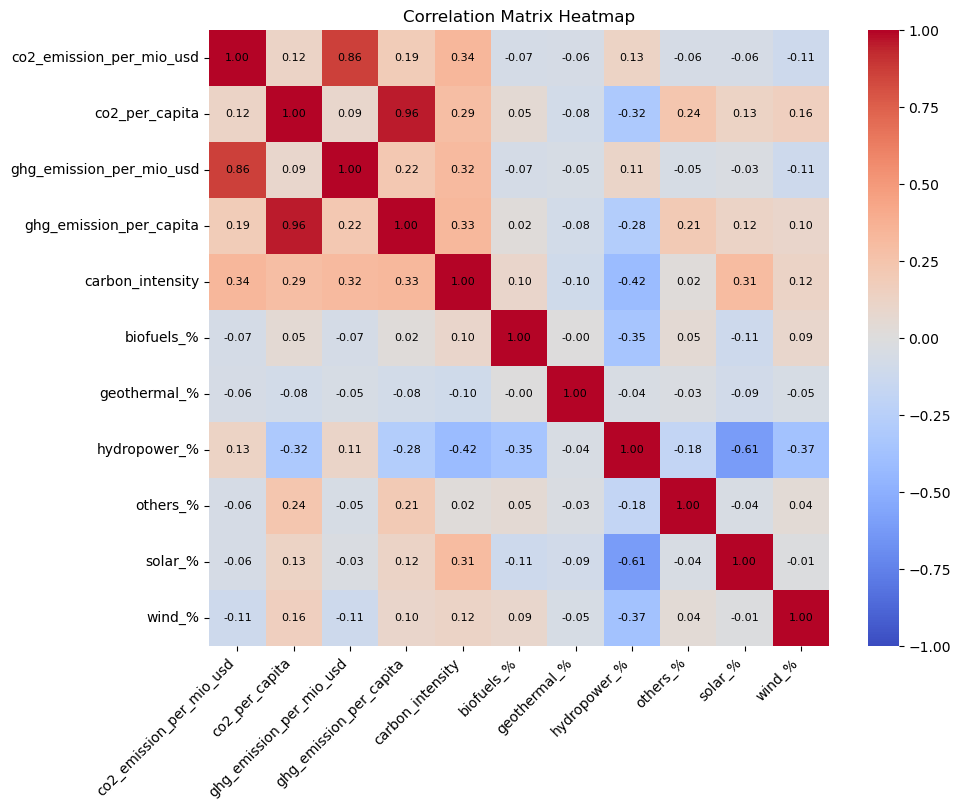

In [ ]:
# Calculate the correlation matrix for the numeric columns
correlation_matrix = emissions_type.corr().round(2)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)

# Add annotations for all cells
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j + 0.5, i + 0.5, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='black', fontsize=8)

# Add titles and labels
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Display the plot
plt.show()

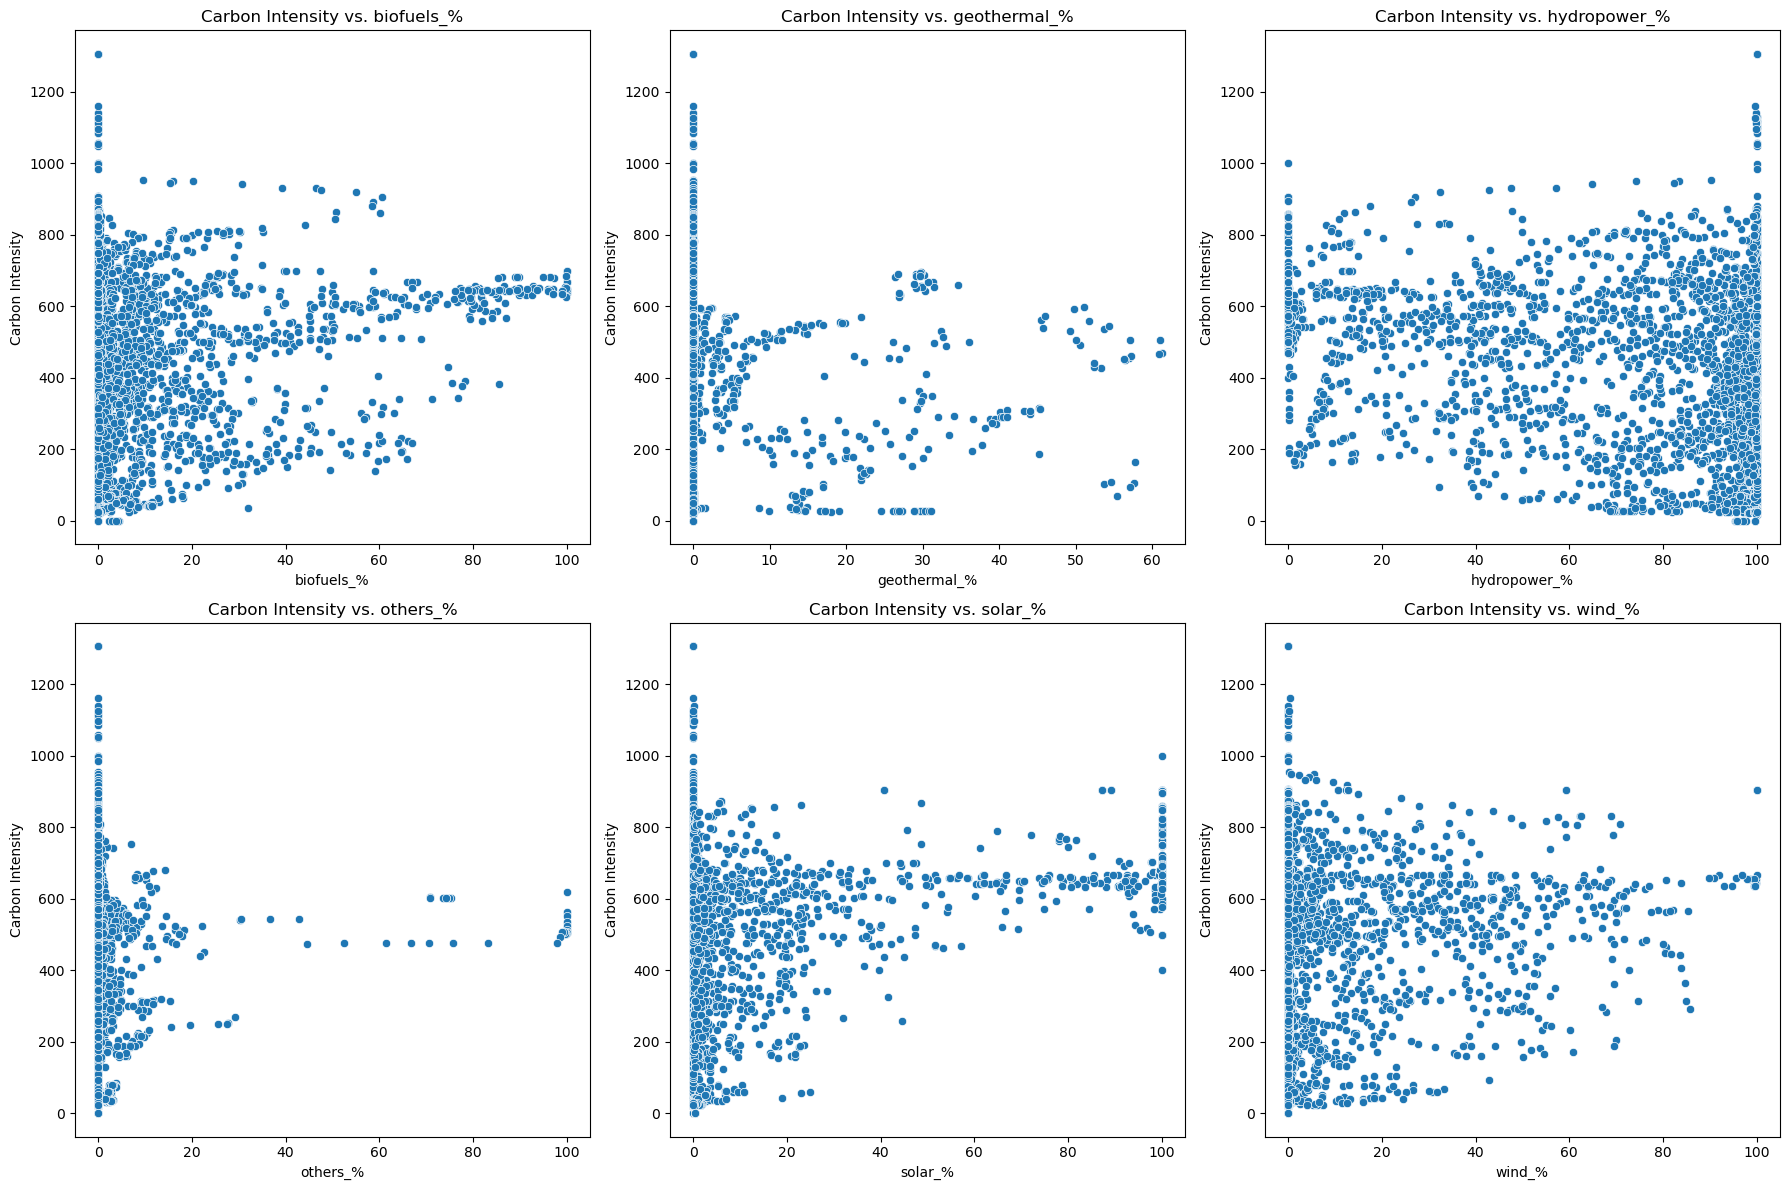

In [ ]:
# Define the list of renewable energy share columns
renewable_columns = ['biofuels_%', 'geothermal_%', 'hydropower_%', 'others_%', 'solar_%', 'wind_%']

# Set up the matplotlib figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Create scatter plots for each renewable energy share column
for i, col in enumerate(renewable_columns):
    sns.scatterplot(x=col, y='carbon_intensity', data=emissions_type, ax=axs[i])
    axs[i].set_title(f'Carbon Intensity vs. {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Carbon Intensity')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
# Define the columns
columns = ['biofuels_%', 'geothermal_%', 'hydropower_%', 'others_%', 'solar_%', 'wind_%', 'carbon_intensity']

# Replace infinite values with NaN and drop rows with NaN values
emissions_type.replace([np.inf, -np.inf], np.nan, inplace=True)
emissions_type.dropna(subset=columns, inplace=True)

# Define the dependent variable and independent variables
X = emissions_type[['biofuels_%', 'geothermal_%', 'hydropower_%', 'others_%', 'solar_%', 'wind_%']]
y = emissions_type['carbon_intensity']

# Add a constant to the independent variables for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       carbon_intensity   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     157.2
Date:                Tue, 11 Jun 2024   Prob (F-statistic):          2.09e-178
Time:                        12:44:46   Log-Likelihood:                -25501.
No. Observations:                3730   AIC:                         5.102e+04
Df Residuals:                    3723   BIC:                         5.106e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          685.9638     16.195     42.356   

### Combine results from before to a combined regression

In [ ]:
# Merge the carbon_intensity dataframe with the emissions_type dataframe
emissions_type_share = pd.merge(emissions_type, re_share[['country_code', 'year', 'share_gen_%']], on=['country_code', 'year'], how='inner')
emissions_type_share

,country_code,country,year,co2_emission_per_mio_usd,co2_per_capita,ghg_emission_per_mio_usd,ghg_emission_per_capita,carbon_intensity,biofuels_%,geothermal_%,hydropower_%,others_%,solar_%,wind_%,share_gen_%
0,CHN,China,2000-01-01,2560.89,2.46,2826.53,2.71,783.31,1.085869,0.041937,98.576796,0.002915,0.016642,0.275840,16.45
1,USA,United States,2000-01-01,559.40,20.32,592.11,21.51,571.16,14.473732,4.425724,76.643944,2.531753,0.214612,1.710235,8.15
2,IND,India,2000-01-01,1904.16,0.84,2098.94,0.93,740.04,3.625914,0.000000,94.673021,0.000000,0.001886,1.699179,13.77
3,RUS,Russia,2000-01-01,5963.32,10.56,7257.36,12.86,470.05,0.013337,0.035160,99.950241,0.000050,0.000000,0.001212,17.83
4,JPN,Japan,2000-01-01,231.33,9.06,234.47,9.18,424.43,9.403807,3.452187,86.663505,0.000000,0.368110,0.112392,9.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3847,STP,Sao Tome and Principe,2020-01-01,298.57,0.64,298.36,0.64,636.36,0.000000,0.000000,94.458438,0.000000,5.541562,0.000000,5.84
3848,VUT,Vanuatu,2020-01-01,135.59,0.40,135.25,0.39,571.43,4.790156,0.000000,37.376401,0.000000,33.135575,24.697869,28.78
3849,TON,Tonga,2020-01-01,242.82,1.12,241.60,1.12,571.43,0.000000,0.000000,0.000000,0.000000,74.992858,25.007142,14.22
3850,KIR,Kiribati,2020-01-01,305.12,0.46,314.52,0.48,666.67,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,16.37


In [ ]:
# Define the columns
columns = ['biofuels_%', 'geothermal_%', 'hydropower_%', 'others_%', 'solar_%', 'wind_%', 'carbon_intensity', 'share_gen_%'] #removed solar

# Replace infinite values with NaN and drop rows with NaN values
emissions_type_share.replace([np.inf, -np.inf], np.nan, inplace=True)
emissions_type_share.dropna(subset=columns, inplace=True)

# Define the dependent variable and independent variables
X = emissions_type_share[['share_gen_%', 'biofuels_%', 'hydropower_%','geothermal_%', 'solar_%', 'others_%', 'wind_%']] #removed solar 
y = emissions_type_share['carbon_intensity']

# Add a constant to the independent variables for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       carbon_intensity   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     1170.
Date:                Tue, 11 Jun 2024   Prob (F-statistic):               0.00
Time:                        12:44:46   Log-Likelihood:                -22608.
No. Observations:                3531   AIC:                         4.523e+04
Df Residuals:                    3524   BIC:                         4.527e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3650      0.005     77.710   

Group the data by country and country code and calculate the average values for the data. Then determine the 10th and 90th percentile and determine the average value for each renewable energy type. 

In [ ]:
# Define the columns
columns = ['biofuels_%', 'geothermal_%', 'hydropower_%', 'others_%', 'solar_%', 'wind_%', 'carbon_intensity', 'share_gen_%'] #removed solar

# Replace infinite values with NaN and drop rows with NaN values
emissions_type_share.replace([np.inf, -np.inf], np.nan, inplace=True)
emissions_type_share.dropna(subset=columns, inplace=True)

# Define the dependent variable and independent variables
X = emissions_type_share[['share_gen_%', 'hydropower_%', 'solar_%']] #removed solar 
y = emissions_type_share['carbon_intensity']

# Add a constant to the independent variables for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       carbon_intensity   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     2308.
Date:                Tue, 11 Jun 2024   Prob (F-statistic):               0.00
Time:                        12:44:46   Log-Likelihood:                -22625.
No. Observations:                3531   AIC:                         4.526e+04
Df Residuals:                    3527   BIC:                         4.528e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          606.3593      7.446     81.440   

In [ ]:
# Define the columns
columns = ['share_gen_%', 'carbon_intensity', 'solar_%', 'hydropower_%', 'wind_%', 'biofuels_%', 'geothermal_%', 'others_%'] #removed solar

grouped_df = emissions_type_share.groupby('country')[columns].mean()
grouped_df


,share_gen_%,carbon_intensity,solar_%,hydropower_%,wind_%,biofuels_%,geothermal_%,others_%
country,,,,,,,,
Afghanistan,80.758571,179.917619,1.699619,98.295058,0.005322,0.000000,0.0,0.000000
Albania,98.754286,31.761905,0.059981,99.940019,0.000000,0.000000,0.0,0.000000
Algeria,0.731429,635.151429,30.735693,68.448642,0.815665,0.000000,0.0,0.000000
Angola,61.979524,217.778571,0.005130,99.476602,0.000000,0.518268,0.0,0.000000
Antigua and Barbuda,1.432500,649.246667,100.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...
Venezuela,66.809524,263.393333,0.003888,99.941824,0.054288,0.000000,0.0,0.000000
Vietnam,40.918095,419.444286,0.932853,97.633667,0.277008,1.150506,0.0,0.005966
Yemen,4.300769,668.616923,100.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [ ]:
# Calculate the 75th percentile of share_gen_%
percentile_90 = grouped_df['share_gen_%'].quantile(0.90)

# Filter rows where share_gen_% is greater than or equal to the 75th percentile
filtered_df = grouped_df[grouped_df['share_gen_%'] >= percentile_90].sort_values('share_gen_%', ascending=False).reset_index()
filtered_df

,country,share_gen_%,carbon_intensity,solar_%,hydropower_%,wind_%,biofuels_%,geothermal_%,others_%
0,Paraguay,99.998571,23.964286,0.000064,99.889748,0.000002,0.110186,0.000000,0.000000
1,Bhutan,99.983810,23.729048,0.004355,99.993301,0.002345,0.000000,0.000000,0.000000
2,Iceland,99.969524,27.327619,0.006235,74.861893,0.014373,0.003779,25.112842,0.000877
3,Lesotho,99.911429,23.713333,0.056514,99.943486,0.000000,0.000000,0.000000,0.000000
4,Eswatini,99.735714,181.567143,0.175343,50.009129,0.000000,49.815529,0.000000,0.000000
5,Republic of Congo,99.612857,341.161429,0.019119,93.397348,0.000000,6.583533,0.000000,0.000000
6,Nepal,99.588571,25.623810,0.461972,99.221634,0.001610,0.314784,0.000000,0.000000
7,Central African Republic,98.955714,74.102857,0.169371,99.830629,0.000000,0.000000,0.000000,0.000000
8,Albania,98.754286,31.761905,0.059981,99.940019,0.000000,0.000000,0.000000,0.000000
9,Ethiopia,98.350476,28.888095,0.066836,96.608581,2.237159,0.896086,0.191338,0.000000


In [ ]:
# Calculate the average of the specified columns for the filtered data
average_values = filtered_df[['carbon_intensity', 'share_gen_%', 'biofuels_%', 'geothermal_%', 'hydropower_%', 'others_%', 'solar_%', 'wind_%']].mean()

average_values

carbon_intensity    67.270926
share_gen_%         97.731958
biofuels_%           3.638055
geothermal_%         2.171857
hydropower_%        93.224874
others_%             0.004841
solar_%              0.387558
wind_%               0.572816
dtype: float64

In [ ]:
# Calculate the 75th percentile of share_gen_%
percentile_10 = grouped_df['share_gen_%'].quantile(0.10)

# Filter rows where share_gen_% is greater than or equal to the 75th percentile
filtered_df = grouped_df[grouped_df['share_gen_%'] <= percentile_10].sort_values('share_gen_%').reset_index()
filtered_df

,country,share_gen_%,carbon_intensity,solar_%,hydropower_%,wind_%,biofuels_%,geothermal_%,others_%
0,Libya,0.018235,776.660000,100.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,Turkmenistan,0.019048,1306.534762,0.000000,100.000000,0.000000,0.000000,0.0,0.000000
2,Bahrain,0.020769,904.577692,53.581604,0.000000,46.418396,0.000000,0.0,0.000000
3,Saudi Arabia,0.030000,697.377778,98.514946,0.000000,1.485054,0.000000,0.0,0.000000
4,Brunei,0.032727,901.634545,100.000000,0.000000,0.000000,0.000000,0.0,0.000000
5,Kuwait,0.055714,649.788571,97.526139,0.000000,2.473861,0.000000,0.0,0.000000
6,Bahamas,0.136429,658.339286,80.321033,0.000000,19.678967,0.000000,0.0,0.000000
7,Botswana,0.168182,845.772727,100.000000,0.000000,0.000000,0.000000,0.0,0.000000
8,Trinidad and Tobago,0.180476,681.012857,65.174774,0.000000,0.123330,34.701896,0.0,0.000000
9,Qatar,0.232000,602.772000,6.724833,0.000000,0.000000,19.637615,0.0,73.637553


In [ ]:
# Calculate the average of the specified columns for the filtered data
average_values = filtered_df[['carbon_intensity', 'share_gen_%', 'biofuels_%', 'geothermal_%', 'hydropower_%', 'others_%', 'solar_%', 'wind_%']].mean()

average_values

carbon_intensity    729.854555
share_gen_%           0.385889
biofuels_%            5.739158
geothermal_%          0.000000
hydropower_%         15.368903
others_%              4.090975
solar_%              69.147486
wind_%                5.653478
dtype: float64

## Economic variables 

In [ ]:
economy = pd.read_csv('./data_clean/gdp_population.csv')

In [ ]:
emissions_share_gdp = emissions_share.merge(economy, how='inner', on=['country_code', 'country', 'year'])
emissions_share_gdp.drop(columns=['Unnamed: 0', 'co2_emission_per_mio_usd', 'ghg_emission_per_mio_usd', 'ghg_emission_per_capita'], inplace=True)

In [ ]:
emissions_share_gdp

,country_code,country,year,co2_per_capita,carbon_intensity,share_cap_%,share_gen_%,share_con_%,gdp_per_capita_usd,total_gdp_usd,total_population_usd,industry_%
0,CHN,China,2000-01-01,2.46,783.31,23.70,16.45,29.63,959.360431,1.211332e+12,1.262645e+09,45.536103
1,USA,United States,2000-01-01,20.32,571.16,10.69,8.15,5.43,36329.956070,1.025095e+13,2.821624e+08,22.451586
2,IND,India,2000-01-01,0.84,740.04,21.18,13.77,46.88,442.034779,4.683949e+11,1.059634e+09,27.325828
3,JPN,Japan,2000-01-01,9.06,424.43,9.18,9.08,3.70,39169.359570,4.968359e+12,1.268430e+08,32.513587
4,DEU,Germany,2000-01-01,9.91,573.13,9.93,6.15,3.70,23694.760480,1.947982e+12,8.221151e+07,27.712378
...,...,...,...,...,...,...,...,...,...,...,...,...
3173,STP,Sao Tome and Principe,2020-01-01,0.64,636.36,7.39,5.84,41.61,2155.265868,4.712295e+08,2.186410e+05,6.058837
3174,VUT,Vanuatu,2020-01-01,0.40,571.43,34.11,28.78,26.03,2917.756849,9.094210e+08,3.116850e+05,NaN
3175,TON,Tonga,2020-01-01,1.12,571.43,35.26,14.22,1.89,4605.970841,4.847969e+08,1.052540e+05,14.775901
3176,KIR,Kiribati,2020-01-01,0.46,666.67,32.94,16.37,42.75,1403.993853,1.775533e+08,1.264630e+05,9.918769


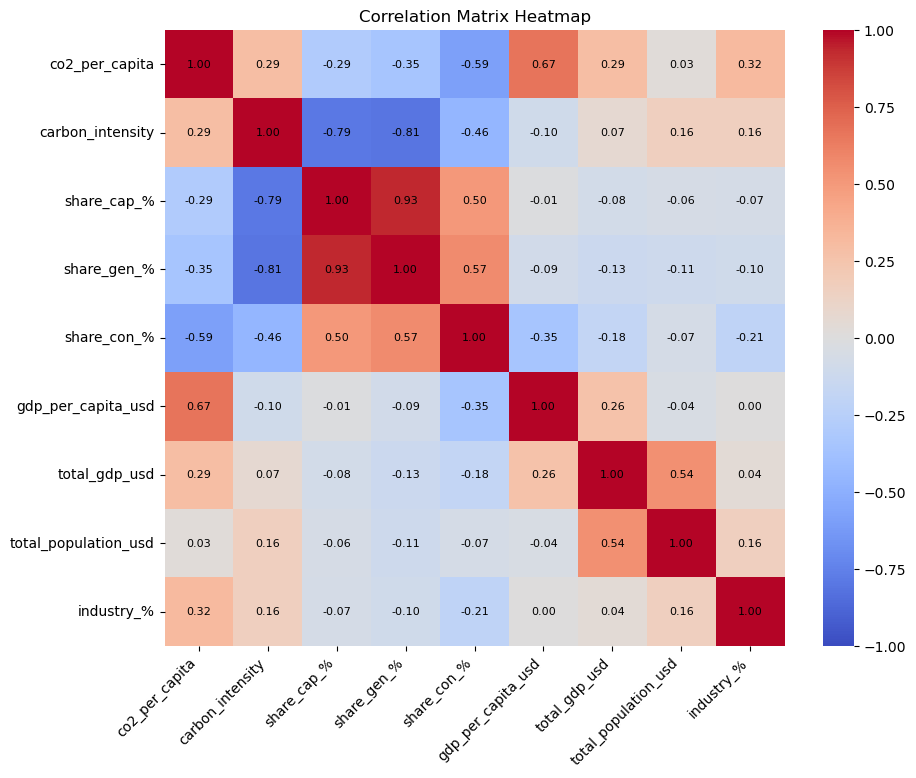

In [ ]:
# Calculate the correlation matrix for the numeric columns
correlation_matrix = emissions_share_gdp.corr().round(2)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)

# Add annotations for all cells
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j + 0.5, i + 0.5, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='black', fontsize=8)

# Add titles and labels
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Display the plot
plt.show()

In [ ]:
# Define the columns
columns = ['gdp_per_capita_usd', 'industry_%', 'total_population_usd','carbon_intensity', 'co2_per_capita','share_gen_%', 'total_gdp_usd', 'total_population_usd'] #removed solar

# Replace infinite values with NaN and drop rows with NaN values
emissions_share_gdp.replace([np.inf, -np.inf], np.nan, inplace=True)
emissions_share_gdp.dropna(subset=columns, inplace=True)

# Define the dependent variable and independent variables
X = emissions_share_gdp[['gdp_per_capita_usd', 'share_gen_%']] #removed solar 
y = emissions_share_gdp['carbon_intensity']

# Add a constant to the independent variables for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       carbon_intensity   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     3575.
Date:                Tue, 11 Jun 2024   Prob (F-statistic):               0.00
Time:                        12:44:47   Log-Likelihood:                -19817.
No. Observations:                3111   AIC:                         3.964e+04
Df Residuals:                    3108   BIC:                         3.966e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                696.0969      4

In [ ]:
# Define the columns
columns = ['gdp_per_capita_usd', 'industry_%', 'total_population_usd','carbon_intensity', 'co2_per_capita','share_gen_%', 'total_gdp_usd', 'total_population_usd'] #removed solar

# Replace infinite values with NaN and drop rows with NaN values
emissions_share_gdp.replace([np.inf, -np.inf], np.nan, inplace=True)
emissions_share_gdp.dropna(subset=columns, inplace=True)

# Define the dependent variable and independent variables
X = emissions_share_gdp[['total_population_usd', 'industry_%', 'share_gen_%']] #removed solar 
y = emissions_share_gdp['carbon_intensity']

# Add a constant to the independent variables for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       carbon_intensity   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     2150.
Date:                Tue, 11 Jun 2024   Prob (F-statistic):               0.00
Time:                        12:44:47   Log-Likelihood:                -19927.
No. Observations:                3111   AIC:                         3.986e+04
Df Residuals:                    3107   BIC:                         3.989e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  609.7966 